# Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df_cancer = data.frame
df_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Analisis del Dataset

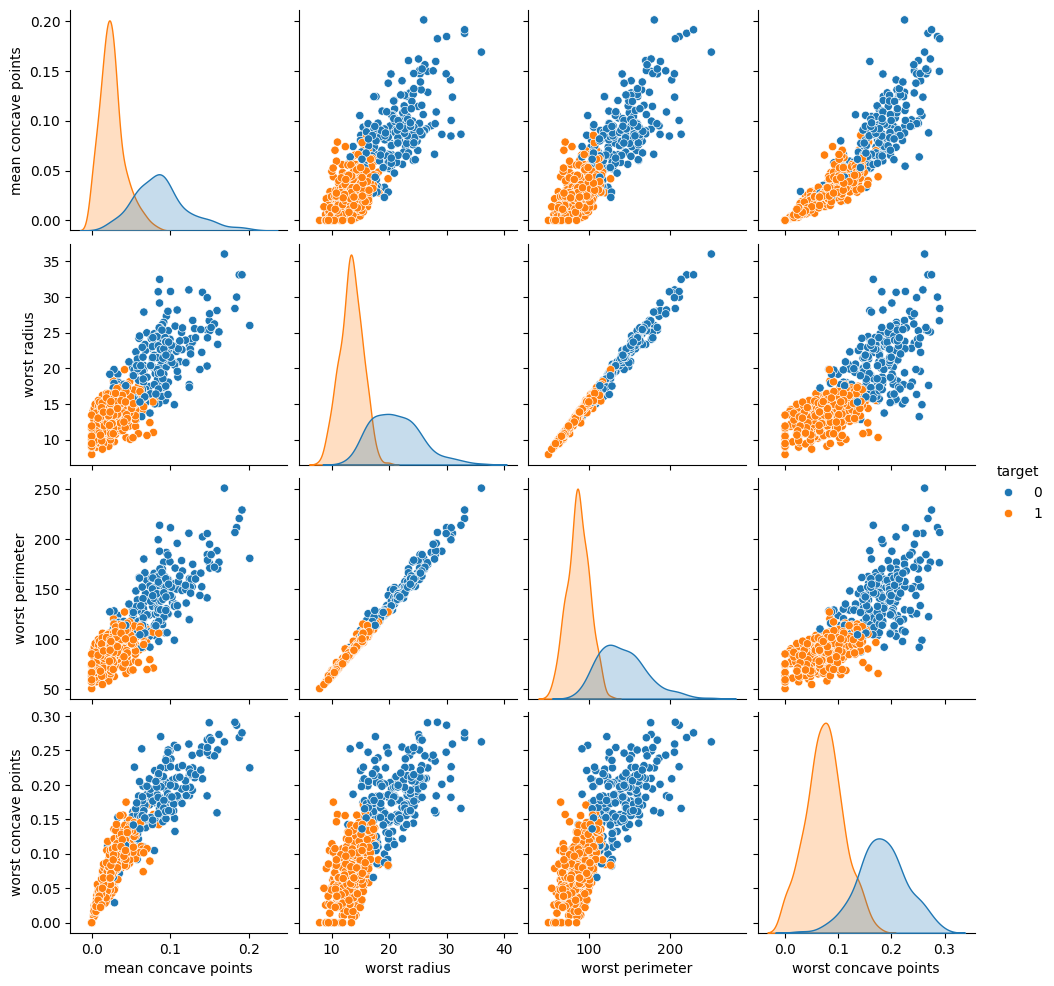

In [3]:
correlation = df_cancer.corr()
threshold = 0.75
filter = np.abs(correlation["target"]) > threshold
correlation_features = correlation.columns[filter].tolist()
sns.pairplot(df_cancer[correlation_features], diag_kind = "kde",  hue="target")
plt.show()

# Preprocesamiento de datos

In [5]:
# Hacemos el Split 70-30 para train-test
X = df_cancer.drop(columns="target")
y = df_cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [9]:
#Pipeline LogisticRegression basico
pl_logreg = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", ['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points'])], remainder="drop")),
    ('classifier', LogisticRegression())
])
pl_logreg.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['mean concave points',
                                                   'worst radius',
                                                   'worst perimeter',
                                                   'worst concave points'])])),
                ('classifier', LogisticRegression())])

In [10]:
y_pred_lg = pl_logreg.predict(X_test)

# Comparamos por Curva ROC

In [12]:
def graficarCurvaRoc( y_pred, model ):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  # Graficamos
  plt.plot(fpr,tpr,label= model +" AUC="+str(round(auc,4))) #,label= "AUC="+str(auc))
  plt.legend(loc=4, fontsize=12)
  return auc

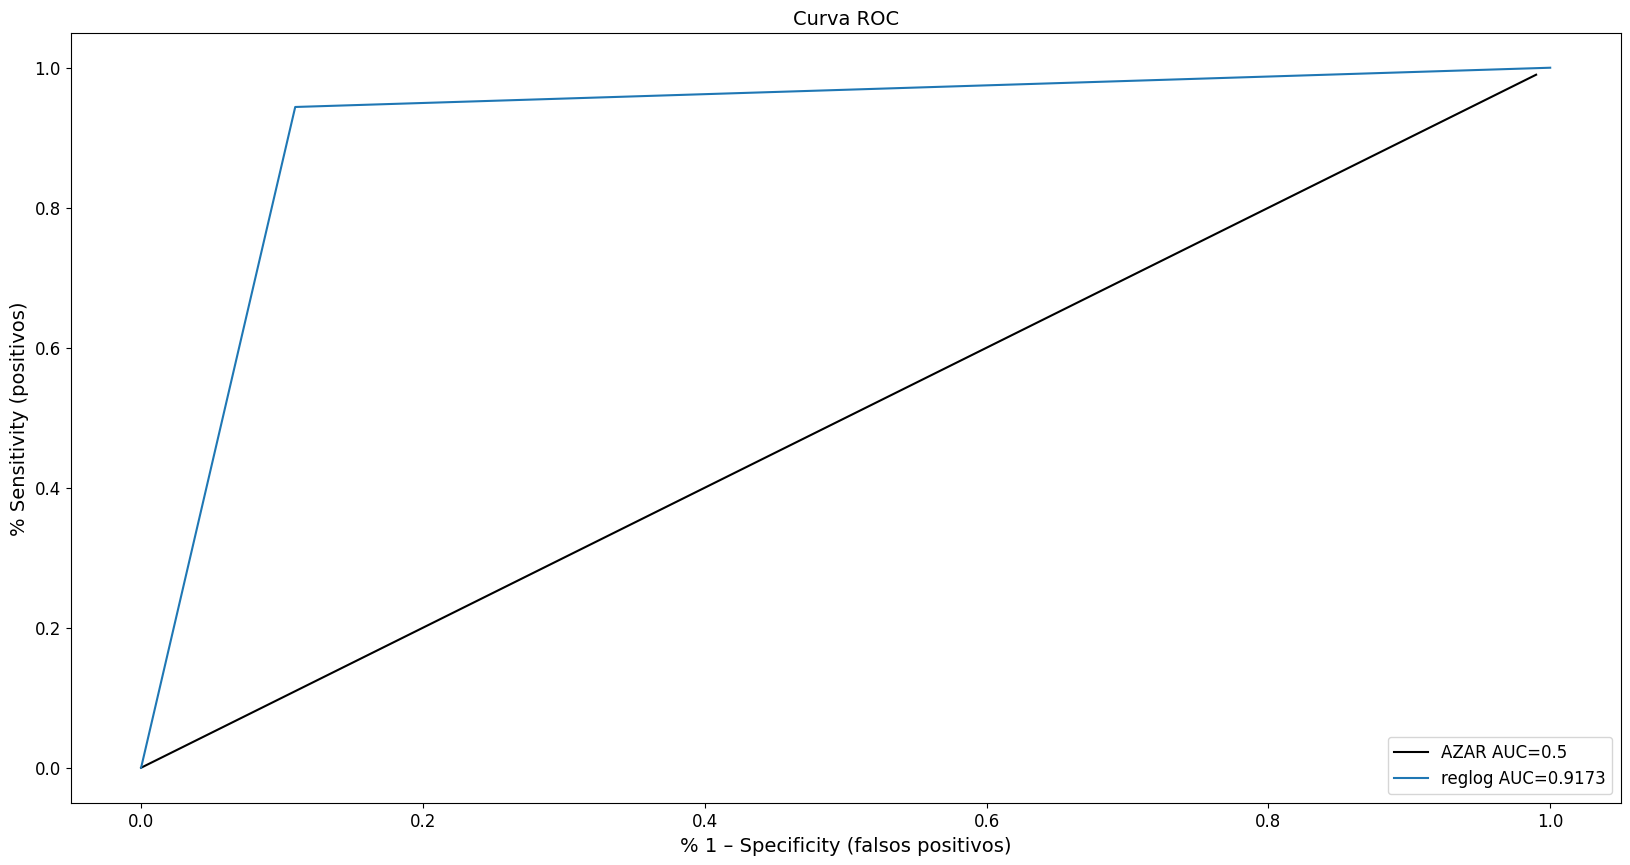

In [13]:
# Inicializamos los labels del gráfico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 – Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'reglog':y_pred_lg}
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tamaño de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

In [14]:
areas.sort_values('auc', ascending=False)

,model,auc
0,reglog,0.917275


# Ejercicio
### Analisis
- Averiguar distribución de la variable target.
- Averiguar cuales de las variables son numéricas.
- Graficar Heatmap de la correlacion entre variables numericas y el target.
### Evaluacion de Modelos
- Crear Pipelines para otros modelos
- Comparar los resultados por sus curvas ROC
### Fine-tunning
- Elegir uno de los modelos y optimizarlo con gridsearchCV